# Notebook to practice querying and selecting real data with SQL

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2)

### Connect to the database
load the SQL extension and establish a connection with the database

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://qgf68825:lqk8p4rkb-941j9s@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

'Connected: qgf68825@BLUDB'

### Store the dataset in a Table
read the dataset source .CSV from the internet into pandas dataframe

create a table in IBM Db2 database to store the dataset

In [3]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [4]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [10]:
chicago_socioeconomic_data.shape

(78, 9)

In [32]:
%sql select count(*) from chicago_socioeconomic_data where hardship_index > 50;

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [33]:
%sql select max(hardship_index) from chicago_socioeconomic_data;

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


In [36]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = 98.0;

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [39]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000;

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


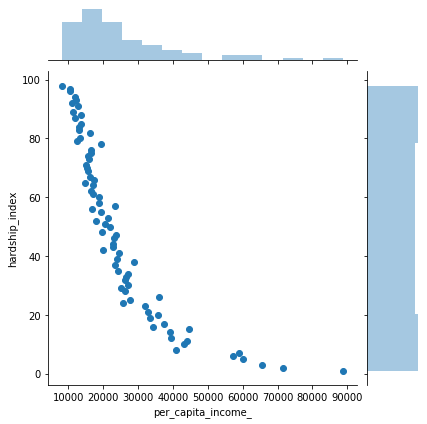

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=chicago_socioeconomic_data)

#income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
#plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

 * ibm_db_sa://qgf68825:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


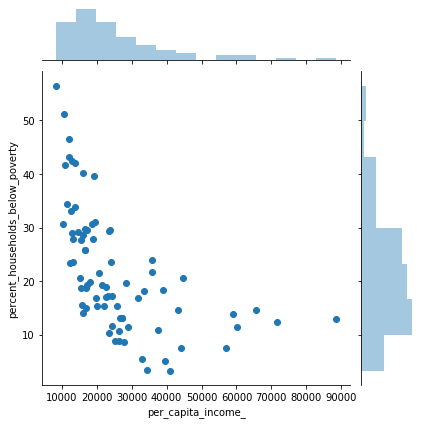

In [47]:
income_v_poverty = %sql select per_capita_income_ , percent_households_below_poverty from chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_', y='percent_households_below_poverty', data=income_v_poverty.DataFrame())